<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/rotation_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii


In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")
tab

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


Text(0, 0.5, 'velocity [km/s]')

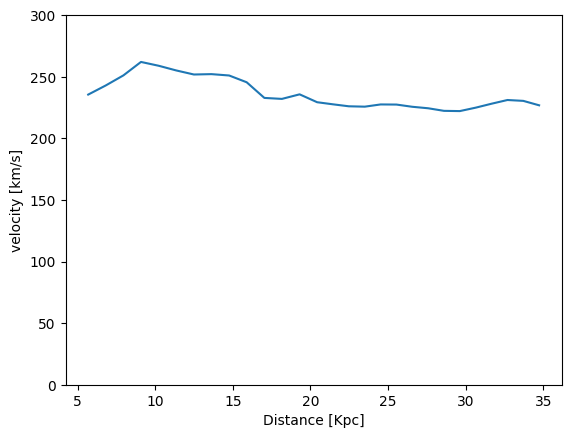

In [ ]:
dis = tab['col2']
vel = tab['col3']
plt.plot(dis,vel)
plt.ylim(0,300)
plt.xlabel("Distance [Kpc]")
plt.ylabel("velocity [km/s]")

In [ ]:
def calc_orbital_velocity(mass, radius):
  return np.sqrt((ac.G * mass) / radius)

In [ ]:
mass =  u.earthMass

radius = u.earthRad

orb_vel = calc_orbital_velocity(mass,radius)

print(orb_vel.to(u.km / u.s))

7.905388234385281 km / s


In [ ]:
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calc_orbital_velocity(mass,radius)

print(orb_vel.to(u.km / u.s))

4.766142291386287 km / s


In [ ]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s

In [ ]:
for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = calc_orbital_velocity(mass,rad)
  vel_bh[i] = orb_vel
  print("The orbital velocity at ", radius, " kpc = ", radius,orb_vel.to(u.km/u.s))


The orbital velocity at  5.68  kpc =  5.68 4.766142291386287 km / s
The orbital velocity at  6.81  kpc =  6.81 4.352789004155528 km / s
The orbital velocity at  7.95  kpc =  7.95 4.028632086788635 km / s
The orbital velocity at  9.08  kpc =  9.08 3.7696258549122557 km / s
The orbital velocity at  10.22  kpc =  10.22 3.5531678501224344 km / s
The orbital velocity at  11.35  kpc =  11.35 3.3716558645298256 km / s
The orbital velocity at  12.49  kpc =  12.49 3.214104201911268 km / s
The orbital velocity at  13.62  kpc =  13.62 3.077886621912613 km / s
The orbital velocity at  14.76  kpc =  14.76 2.956636901678396 km / s
The orbital velocity at  15.89  kpc =  15.89 2.8495692993877366 km / s
The orbital velocity at  17.03  kpc =  17.03 2.7525413240352865 km / s
The orbital velocity at  18.16  kpc =  18.16 2.6655280045445924 km / s
The orbital velocity at  19.3  kpc =  19.3 2.585607014258112 km / s
The orbital velocity at  20.43  kpc =  20.43 2.513083903274837 km / s
The orbital velocity at 

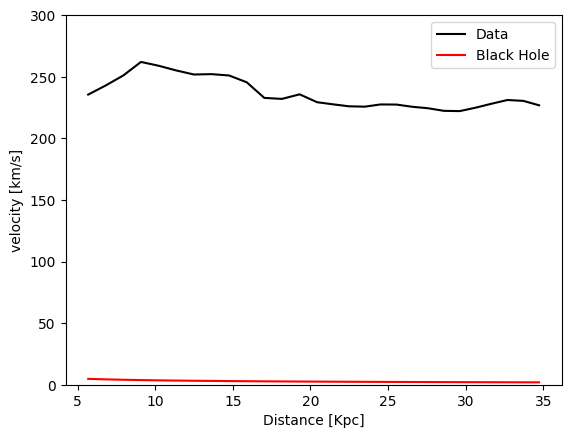

In [47]:
dis = tab['col2']
vel = tab['col3']
plt.plot(dis,vel, color ="black", label = "Data")
plt.plot(dis,vel_bh.value, color = "red", label = "Black Hole")
plt.ylim(0,300)
plt.xlabel("Distance [Kpc]")
plt.ylabel("velocity [km/s]")
plt.legend()